In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0and no total charges are recorded

In [14]:
df ["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df ["TotalCharges"] = df["TotalCharges"].astype("float")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.isnull().sum().sum()

np.int64(0)

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
df["customerID"].duplicated().sum()

np.int64(0)

In [28]:
def conv(value):
    if value == 1:
          return "yes"
    else:
       return"no"
df['SenoirCitizen'] =df["SeniorCitizen"].apply(conv)

#converted 0 and 1 values of sernior citizen to yes or no to make it easier to understand

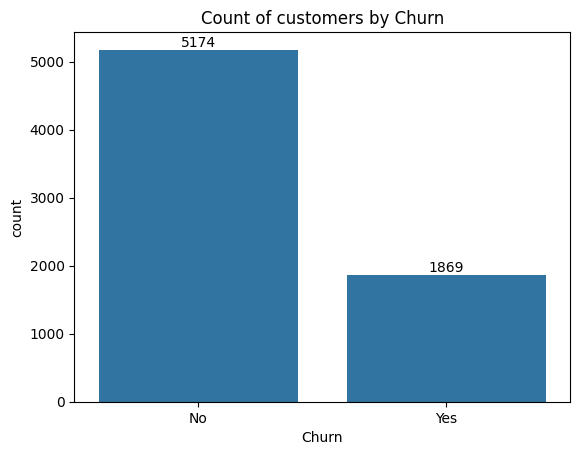

In [33]:
ax = sns.countplot(x ='Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

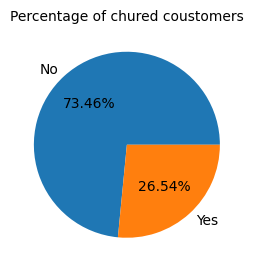

In [39]:
plt.figure(figsize =(3,4))
gb =df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct ="%1.2f%%")
plt.title("Percentage of chured coustomers" , fontsize =10)
plt.show()

#from the given pie chart we can conclued that 26.54% of our customers have churned out.#now let's explore the resons behind it.

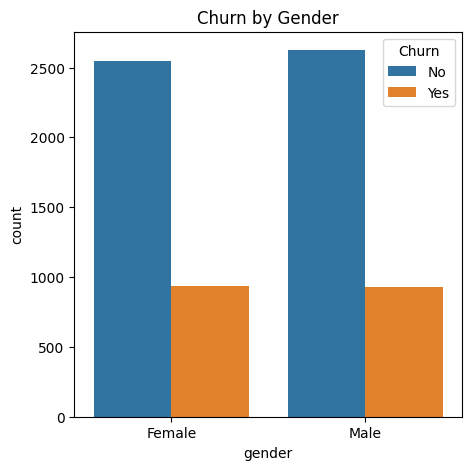

In [60]:
plt.figure(figsize =(5,5))
sns.countplot(x ="gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

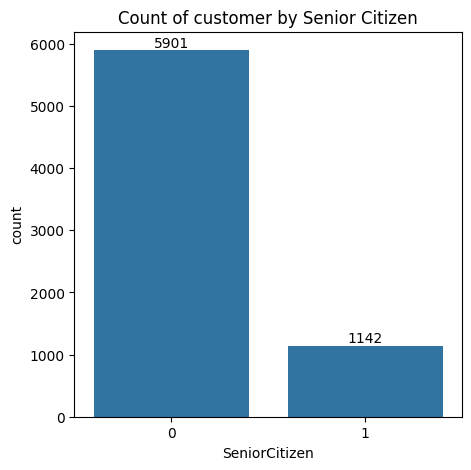

In [93]:
plt.figure(figsize =(5,5))
ax = sns.countplot(x = "SeniorCitizen", data =df)
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Senior Citizen")
plt.show()

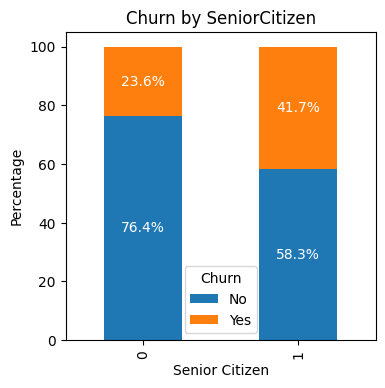

In [62]:
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(4, 4))
df_percent.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
plt.title("Churn by SeniorCitizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")

# Add percentage labels to each section of the stacked bar
for i, senior_citizen in enumerate(df_percent.index):
    for j, churn_status in enumerate(df_percent.columns):
        percentage = df_percent.loc[senior_citizen, churn_status]
        if percentage > 0:  # Only label non-zero sections
            ax.text(i, df_percent.loc[senior_citizen, :churn_status].sum() - (percentage / 2),
                    f'{percentage:.1f}%', ha='center', va='center', color='white')
plt.show()



#compartive a greated percentage of people in senior citizen category have chured.

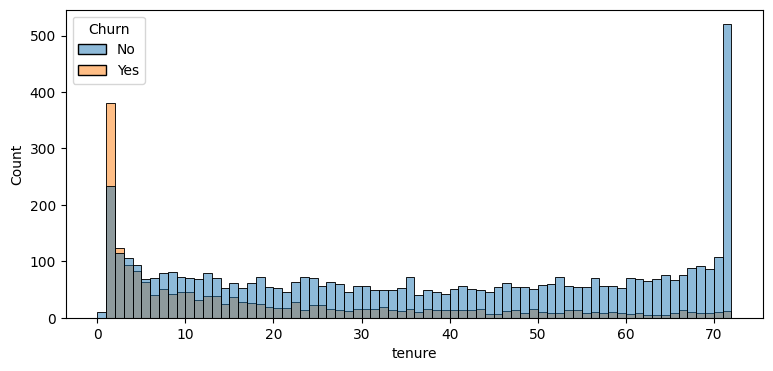

In [64]:
plt.figure(figsize =(9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue ="Churn")
plt.show()

#people who have used our services for long time have stayed  and people who have used our serivice #1 or 2 months have churend.

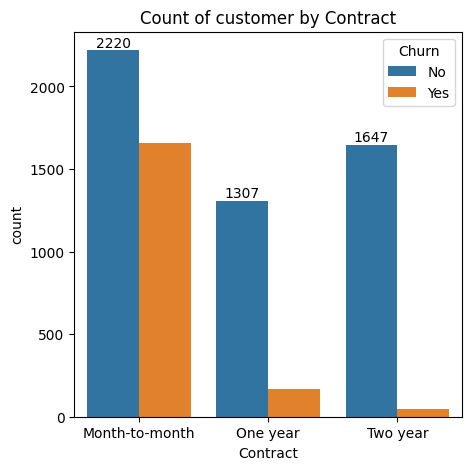

In [67]:
plt.figure(figsize =(5,5))
ax = sns.countplot(x = "Contract", data =df, hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Contract")
plt.show()

#people who have moth to month contact are likely to churn then those who have 1 or 2 years or contact.

In [69]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SenoirCitizen'], dtype=object)

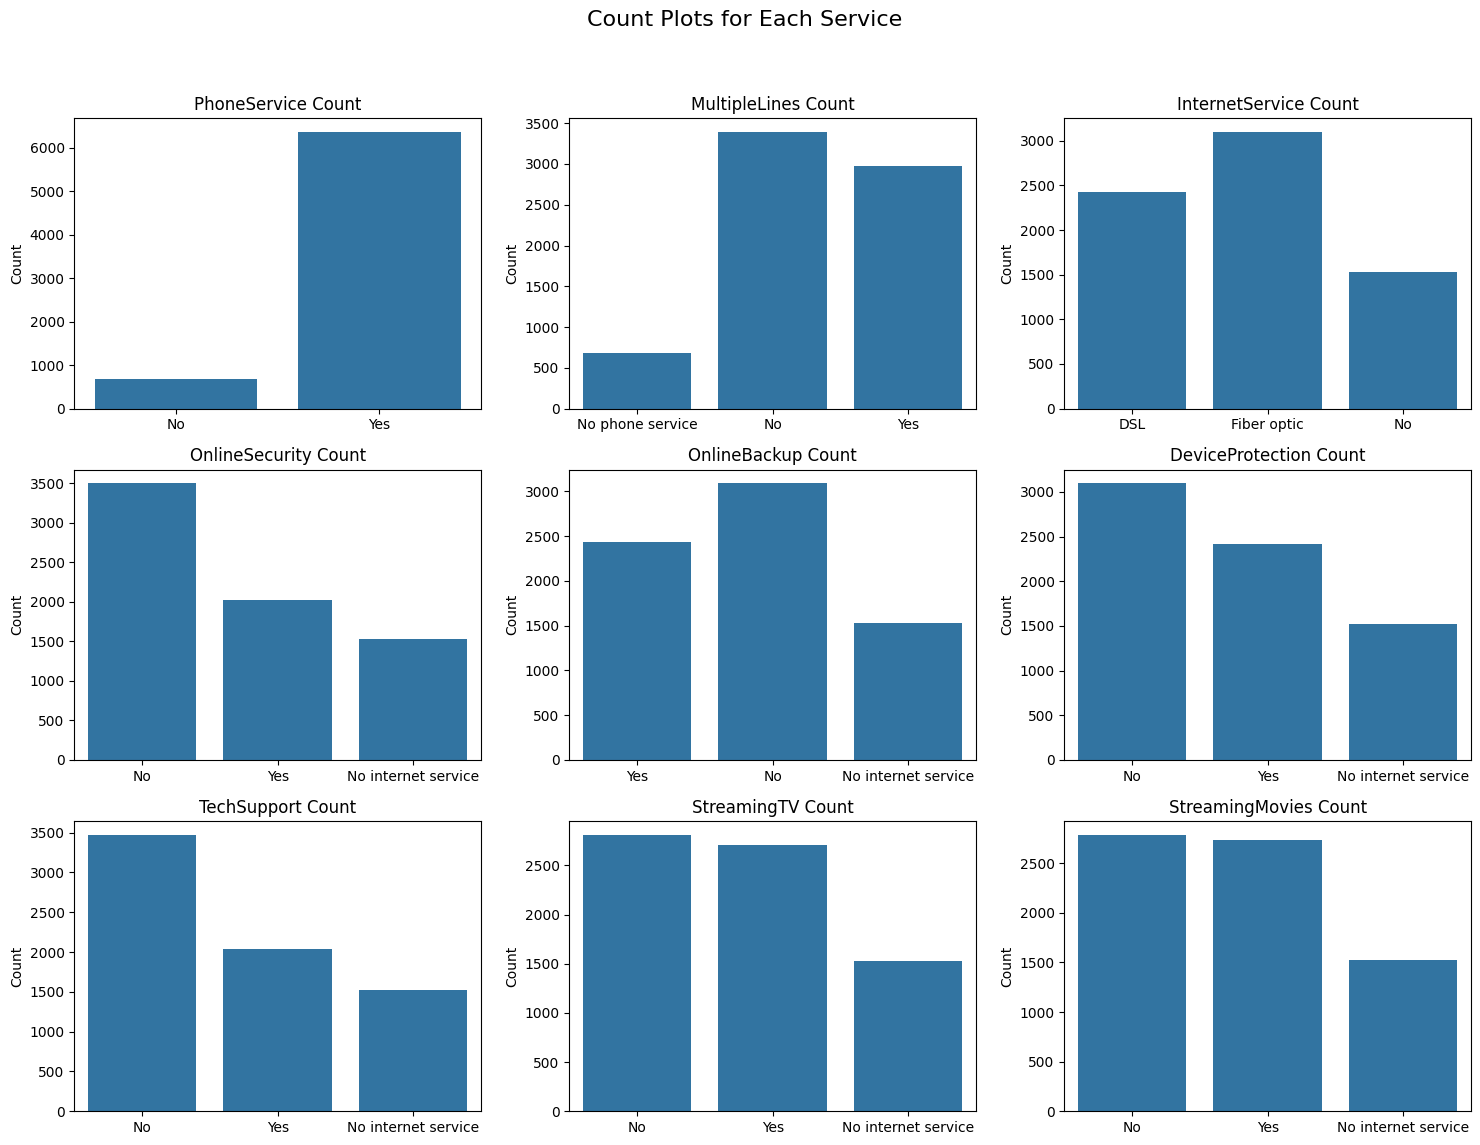

In [89]:


# List of columns for which to create count plots
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplot grid (3 rows, 3 columns for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Count Plots for Each Service", fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'{column} Count')
    axes[i].set_xlabel('')  # Remove x-axis label for cleaner look
    axes[i].set_ylabel('Count')

# Hide any unused subplots if there are more subplots than columns
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for title
plt.show()

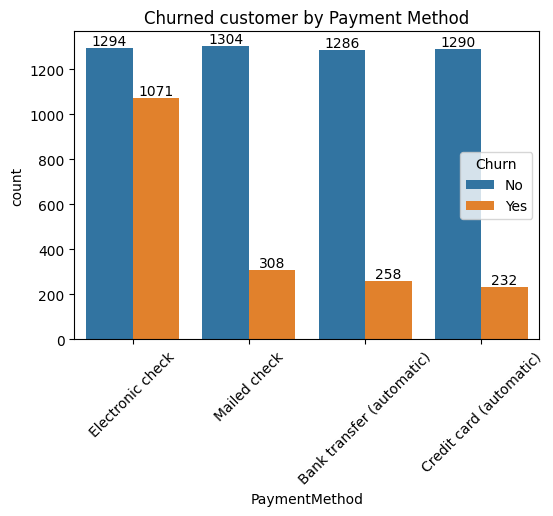

In [92]:
plt.figure(figsize =(6,4))
ax = sns.countplot(x = "PaymentMethod", data =df, hue ="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customer by Payment Method")
plt.xticks(rotation=45)
plt.show()

#customers is likely to churn when he is using electronic check as a payment menthod.+